# Python programming with scikit-learn
Jay Hineman

## What do we want programming to do for us generally?
1. *Encapsulation/separation*: code does one thing and doesn't need other parts.
2. *Reuse*: we don't need to write the same part of code again.
3. *Consistency/reliability*: code runs successfully even under certain changes and variations.
4. *Code can be verified through tests.*

(Useful rabbit hole: [SOLID design principles](https://en.wikipedia.org/wiki/SOLID))

## How are these reflected in data science?
1. Seperation might occur across datasets, statistical technique (i.e. algorithm), or platform.
2. Reuse we do not want to re-write methods to load data and many cases we do not want to write our own regressor or classifier, we might however want a framework to that. If we learn statistical models which believe to be useful, we would like to be able to save, load, and share them (io).
3. Methods to load, transform, or predict data should work so long as we meet their *interface* requirements, i.e. if we provide valid variations we recieve valid output. The code is not fragile to specifics of data, parameters, specific development, or runtime enviroment.
4. We should be able to provide mathematical test cases for individual component (unit tests), combinations of such tests (integration tests), or all components together (end-to-end tests).

## Scikit-learn
1. Object-oriented python framework for machine learning including classification, regression, clustering, data transformation.
2. Large collection of techniques which work with other python tools (pandas, numpy, matplotlib)
3. Can be extended to provide your own new method.

# Demonstration
* Use scikit-learn functionality to analyze the taxi dataset

## Regression

### Functions for loading and cleaning the data

In [35]:
# complete the following implementation
import pandas as pd

def raw_taxi_df(filename: str) -> pd.DataFrame:
    """Load raw taxi dataframe from parquet"""
    pass

def clean_taxi_df(raw_df: pd.DataFrame) -> pd.DataFrame:
    """Make a clean taxi DataFrame that throws out non-numerical or outlying numerical values"""
    pass

In [37]:
# possible solution:
# functions to load and clean data; we'll want these to live elsewhere in their final versions
import pandas as pd

def raw_taxi_df(filename: str) -> pd.DataFrame:
    """Load raw taxi dataframe from parquet"""
    return pd.read_parquet(path=filename)

def clean_taxi_df(raw_df: pd.DataFrame) -> pd.DataFrame:
    """Make a clean taxi DataFrame that throws out non-numerical or outlying numerical values"""
    # drop nans
    clean_df = raw_df.dropna()
    # remove trips longer than 100
    clean_df = clean_df[clean_df["trip_distance"] < 100]
    # add columns for travel time deltas and time minutes
    clean_df["time_deltas"] = clean_df["tpep_dropoff_datetime"] - clean_df["tpep_pickup_datetime"]
    clean_df["time_mins"] = pd.to_numeric(clean_df["time_deltas"]) / 6**10
    return clean_df

In [38]:
# try it
raw_df = raw_taxi_df(filename="yellow_tripdata_2024-01.parquet")
clean_df = clean_taxi_df(raw_df=raw_df)
clean_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time_deltas,time_mins
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00,0 days 00:19:48,19.647348
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,...,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00,0 days 00:06:36,6.549116
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,...,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00,0 days 00:17:55,17.778535
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,...,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00,0 days 00:08:18,8.236010
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,...,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00,0 days 00:06:06,6.052971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824457,2,2024-01-31 23:10:28,2024-01-31 23:18:30,1.0,3.51,1.0,N,138,129,1,...,6.0,0.5,4.76,0.0,1.0,30.31,0.0,1.75,0 days 00:08:02,7.971399
2824458,2,2024-01-31 23:01:04,2024-01-31 23:17:35,1.0,3.36,1.0,N,162,261,1,...,1.0,0.5,5.85,0.0,1.0,29.25,2.5,0.00,0 days 00:16:31,16.389328
2824459,1,2024-01-31 23:08:13,2024-01-31 23:25:00,3.0,3.30,1.0,N,43,249,1,...,3.5,0.5,1.00,0.0,1.0,23.70,2.5,0.00,0 days 00:16:47,16.653939
2824460,1,2024-01-31 23:49:46,2024-01-31 23:53:10,0.0,0.40,1.0,N,142,163,2,...,3.5,0.5,0.00,0.0,1.0,10.10,2.5,0.00,0 days 00:03:24,3.373787


In [40]:
# note the column difference
raw_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


### Functions for splitting the data

In [6]:
# complete the following implementation
from typing import Any

def split_taxi_data(clean_df: pd.DataFrame, x_column: str, y_column: str, train_size: int|float) -> tuple[Any, Any, Any, Any]:
    """Split an x, y dataset selected from a clean dataframe; return x_train, y_train, x_test, y_test"""
    pass


In [41]:
# possible soltion:
# TODO: move to a package/module

from typing import Any
from sklearn.model_selection import train_test_split

def split_taxi_data(clean_df: pd.DataFrame, 
                    x_column: str, 
                    y_column: str, 
                    train_size: int) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Split an x, y dataset selected from a clean dataframe; return x_train, y_train, x_test, y_test"""
    return train_test_split(clean_df[[x_column]], clean_df[[y_column]], train_size=train_size)
    

In [42]:
# try it
X_train, X_test, y_train, y_test = split_taxi_data(clean_df=clean_df, 
                                                   x_column="trip_distance", 
                                                   y_column="fare_amount", 
                                                   train_size=100000)

In [9]:
X_train

,trip_distance
1326455,10.50
1321887,13.37
2607085,0.64
1838112,2.95
1040583,1.60
...,...
2265766,1.20
859842,1.68
317718,10.84
571616,2.04


In [10]:
y_train

,fare_amount
1326455,39.4
1321887,59.7
2607085,6.5
1838112,18.4
1040583,9.3
...,...
2265766,8.6
859842,14.2
317718,45.7
571616,12.8


### Nearest Neighbor Regression on this split
* based on gallery example on [nearest neighbor regression](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py)


In [43]:
# complete the following implementation
from sklearn import neighbors

def fit_knn(x_train, y_train, n_neighbors, weights):
    """A function wrapper to the scikit-learn API that performs fit"""
    pass

In [46]:
# possible solution:
from sklearn import neighbors

def train_knn_regressor(x_train: pd.Series, 
                        y_train: pd.Series, 
                        n_neighbors: int, 
                        weights: str)->neighbors.KNeighborsRegressor:
    """A function wrapper to the scikit-learn API that performs fit and predict"""
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(x_train, y_train)
    return knn

In [45]:
# try it
knn_regressor = train_knn_regressor(x_train=X_train, y_train=y_train, n_neighbors=2, weights="distance")

In [47]:
y_predict = knn_regressor.predict(X_test.iloc[0:100000])

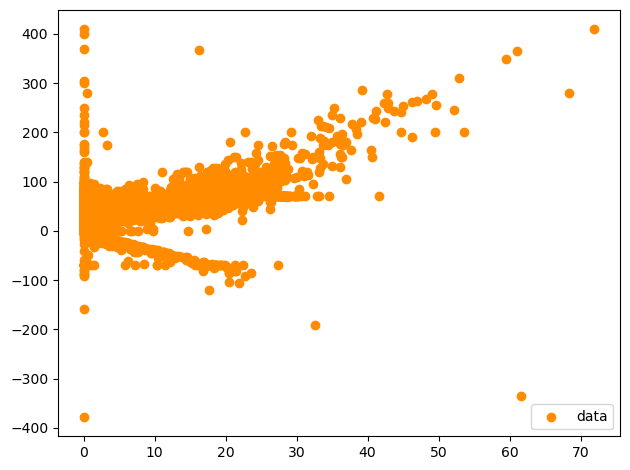

In [50]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color="darkorange", label="data")
#plt.plot(X_test.iloc[0:100000], y_predict, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (2, "distance"))

plt.tight_layout()
plt.show()

# Learn more

## Gallery
* [Examples of scikit-learn](https://scikit-learn.org/stable/auto_examples/index.html)

## Reproducer Essay
* [Essay and tutorial about making reproducible scikit-learn code](https://scikit-learn.org/stable/developers/minimal_reproducer.html)

## Developing for the scikit-learn API
* [Developing scikit-learn estimators](https://scikit-learn.org/stable/developers/develop.html)